In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

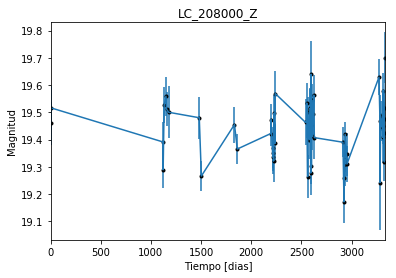

In [2]:
data = np.genfromtxt('LC_208000_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_208000_Z')
plt.savefig("LC_208000_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

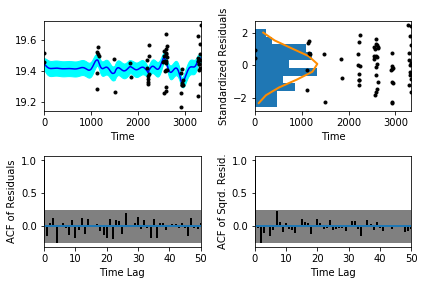

In [5]:
sample.assess_fit()

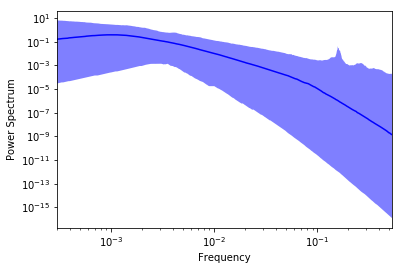

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

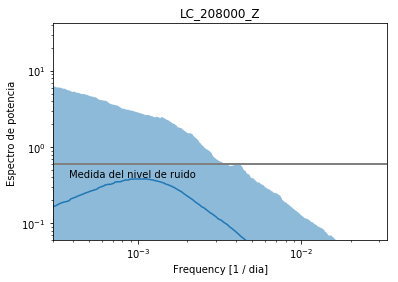

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_208000_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_208000_Z')

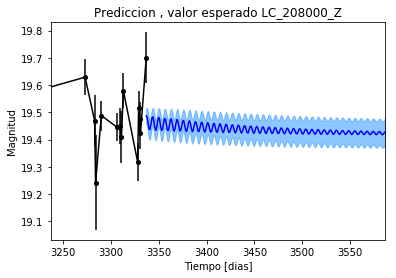

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_208000_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_208000_Z')

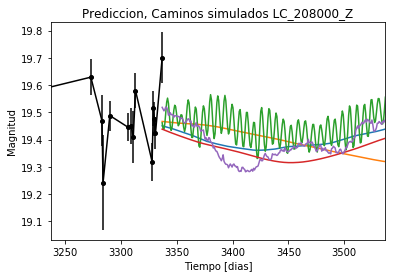

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_208000_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


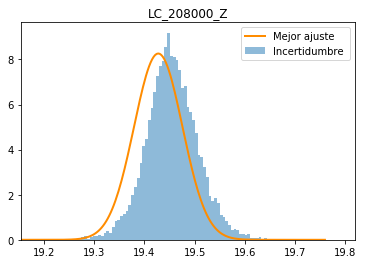

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_208000_Z')
plt.savefig("Mejor_ajuste_LC_208000_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_208000_Z')

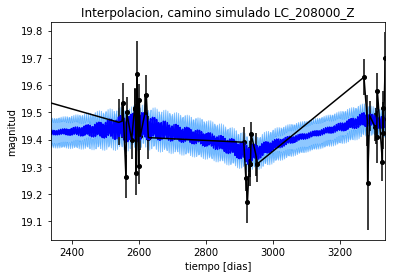

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_208000_Z')

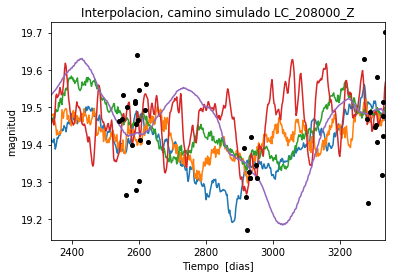

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 639.162489642
Median: 0.00672207593321
Standard deviation: 0.175579526383
68% credibility interval: [ 0.00074717  0.12065112]
95% credibility interval: [  3.51973201e-04   7.19677591e-01]
99% credibility interval: [  3.06837367e-04   9.72954785e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 897.896353548
Median: 0.0027831491293
Standard deviation: 0.106366480686
68% credibility interval: [ 0.00060182  0.03495233]
95% credibility interval: [  3.36806028e-04   3.52779530e-01]
99% credibility interval: [  3.05990234e-04   7.44313238e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 425.061906426
Median: 0.00746392362591

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 818.545712984
Median: 83.4411403466
Standard deviation: 1.8157125405
68% credibility interval: [ 81.50080156  84.85719418]
95% credibility interval: [ 79.17459376  86.49553757]
99% credibility interval: [ 77.20875427  87.36287894]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 451.215474337
Median: 0.515325575674
Standard deviation: 2.17128802563
68% credibility interval: [ 0.04433749  3.46768161]
95% credibility interval: [ 0.01162354  7.39619013]
99% credibility interval: [  8.65274276e-03   1.10650921e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 505.913206393
Median: 1.00526100455
Standard deviation: 11.4069660293
68% credibility interval: [  0.0273637   16.18625299]
95% credibility interval: [  1.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3109.52855323
Median: 74856124641.8
Standard deviation: 5.05702875666e+90
68% credibility interval: [  3.75299955e-47   1.27067402e+38]
95% credibility interval: [  1.39659518e-89   8.83728111e+73]
99% credibility interval: [  9.24847518e-102   1.52118922e+086]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2049.79386718
Median: 19.4256454562
Standard deviation: 0.0261580359904
68% credibility interval: [ 19.40352489  19.44695959]
95% credibility interval: [ 19.37961548  19.4806118 ]
99% credibility interval: [ 19.35045006  19.51291918]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 525.552220173
Median: 0.0632070038918
Standard deviation: 0.292397487354
68% credibility interval: [ 0.          0.58353995]
95% credibility interval: [ 0.          0.95533604]
99% credibility interval: [ 0.          1.03100792]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 525.552220173
Median: 0.0632070038918
Standard deviation: 0.292397487354
68% credibility interval: [ 0.          0.58353995]
95% credibility interval: [ 0.          0.95533604]
99% credibility interval: [ 0.          1.03100792]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 343.937674973
Median: 0.0
Standard deviation: 0.0515162529885
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 818.545712984
Median: 83.4411403466
Standard deviation: 1.8157125405
68% credibility interval: [ 81.50080156  84.85719418]
95% credibility interval: [ 79.17459376  86.49553757]
99% credibility interval: [ 77.20875427  87.36287894]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2160.25937943
Median: 0.00390796528334
Standard deviation: 0.00470228597818
68% credibility interval: [ 0.00195525  0.00769343]
95% credibility interval: [ 0.00087838  0.0156529 ]
99% credibility interval: [ 0.00047795  0.0291486 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1186.8124189
Median: 1.306288689
Standard deviation: 0.21495839329
68% credibility interval: [ 1.09922713  1.53532307]
95% credibility interval: [ 0.92474744  1.76977846]
99% credibility interval: [ 0.80981705  1.89634083]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 315.162968202
Median: 1.977425655e-13
Standard deviation: 0.218800155599
68% credibility interval: [  1.65296802e-40   2.35863934e-03]
95% credibility interval: [  2.71189187e-75   3.65935541e-01]
99% credibility interval: [  9.76726057e-88   1.28514028e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 639.162489642
Median: (-0.0422360487373-0.0230318756927j)
Standard deviation: 2.14296655059
68% credibility interval: [-0.75807335-0.64965434j -0.00469460-0.52558556j]
95% credibility interval: [ -4.52186767e+00-4.88494502j  -2.21151284e-03-0.00997741j]
99% credibility interval: [ -6.11325521e+00-3.61724161j  -1.92791604e-03-0.00628733j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 897.896353548
Median: (-0.0174870417169+2.81072790676j)
Standard deviation: 1.95497066456
68% credibility interval: [-0.21961199+2.65599375j -0.00378132+0.01944784j]
95% credibility interval: [ -2.21657916e+00+6.01053531j  -2.11621469e-03+0.08049073j]
99% credibility interval: [ -4.67665800e+00+6.36900303j  -1.92259334e-03+0.02285744j]
Po